In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Data Wrangling

In [41]:
room = pd.read_excel('../dataset/202306.xlsx', sheet_name = 'Room')
project = pd.read_excel('../dataset/202306.xlsx', sheet_name = 'Project')
property_nearby = pd.read_excel('../dataset/202306.xlsx', sheet_name = 'Property Nearby')

## Room Table

In [42]:
room.isna().sum()

room_id                    0
project_id                 0
post_name                  0
condo_link                 0
last_update                0
poster_name              773
poster_status            773
rental                     0
rental_unit                0
deposit                    0
deposit_unit              14
advance_payment            0
advance_payment_unit      12
room_description           7
building                7475
facing                  9668
no_bedroom                44
floor                    492
room_size                  0
unit_type                  0
air_conditioner            0
digital_door_lock          0
furnished                  0
hot_tub                    0
in_room_wifi               0
kitchen_hood               0
kitchen_stove              0
phone                      0
refrigerator               0
tv                         0
washer                     0
water_heater               0
project_name               0
dtype: int64

In [43]:
# Let's look at deposit and deposit_unit
room.groupby('deposit')['deposit'].count()
room.groupby('deposit_unit')['deposit'].count()

# Replace with mode value (2 months)
repl_index = room[(room['deposit']!='1') & (room['deposit']!='3') & (room['deposit']!='NO_DEPOSIT')].index
room.loc[repl_index,'deposit'] = 2
room['deposit'] = room['deposit'].replace('NO_DEPOSIT',0)
room['deposit_unit'] = 'month'

# Let's look at advance_payment and advance_payment_unit
room.groupby('advance_payment')['advance_payment'].count()
room.groupby('advance_payment_unit')['advance_payment_unit'].count()

# Replace with mode value (1 month)
repl_index = room[(room['advance_payment']!='2') & (room['advance_payment']!='NO_ADVANCE_PAYMENT')].index
room.loc[repl_index,'advance_payment'] = 1
room['advance_payment'] = room['advance_payment'].replace('NO_ADVANCE_PAYMENT',0)
room['advance_payment_unit'] = 'month'

In [44]:
# Let's look at building
room.groupby('building')['building'].count()
# This seems random. I'll ignore it

# Let's look at facing
room.groupby('facing')['facing'].count()
# This looks good

# Let's look at no_bedroom
room.groupby('no_bedroom')['no_bedroom'].count()
# This looks good

# Let's look at unit_type
room.groupby('unit_type')['unit_type'].count()
# This looks good

# Let's look at floor
room.groupby('floor')['floor'].count()
# Data seems messed up

# Let's look at room_size
room.groupby('room_size')['room_size'].count()
# This looks good, but let's strip out sq.m. and get only the room size number

room_size
1 sq.m.          4
100 sq.m.       36
101 sq.m.        4
101.05 sq.m.     3
102 sq.m.       14
                ..
96 sq.m.        32
97 sq.m.        14
98 sq.m.        11
98.7 sq.m.       2
99 sq.m.        23
Name: room_size, Length: 500, dtype: int64

In [45]:
# Let's look at unique values
room['floor'].unique()

# Now, let's extract only the floor
floor_1 = []
for f in room['floor']:
    f_temp = str(f).strip('thsd+ florbcn').lower().replace('x','')
    if '-' in f_temp:
        floor_1.append(f_temp[:f_temp.find('-')-1])
        continue
    if '12a' in f_temp:
        floor_1.append('13')
        continue
    if 'a' in f_temp:
        floor_1.append('')
        continue
    floor_1.append(f_temp)

floor_2 = []
for f in floor_1:
    f_temp = str(f).strip('bcd.higf')
    if '-' in f_temp:
        floor_2.append(f_temp[:f_temp.find('-')-1])
        continue
    if 'มีลิฟ' in f_temp:
        floor_2.append(f_temp[:f_temp.find('มีลิฟ')-2])
        continue
    if 'สูง' in f_temp:
        floor_2.append('')
        continue
    if 'วิว' in f_temp:
        floor_2.append(f_temp[:f_temp.find('วิว')-2])
        continue
    if ',' in f_temp:
        floor_2.append(f_temp[:f_temp.find(',')-1])
        continue
    floor_2.append(f_temp)

room['floor'] = pd.to_numeric(floor_2)

# Let's look at the results
room.groupby('floor')['floor'].count()[40:]

# floors above 70 seem to be a little extreme. So, I'll assume the user typed wrong, and replace the oneth digit with blank
floor_temp = []
for f in room['floor']:
    if f<=70:
        floor_temp.append(f)
    elif math.isnan(f):
        floor_temp.append(f)
    else:
        floor_temp.append(round(f/10-0.5))
        
room['floor'] = floor_temp

# Let's look at the results
room.groupby('floor')['floor'].count()[40:]
# This looks good

/var/folders/57/bvrssn654352dymj7q9n3j_w0000gn/T/ipykernel_34214/847139265.py:42: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  room.groupby('floor')['floor'].count()[40:]
/var/folders/57/bvrssn654352dymj7q9n3j_w0000gn/T/ipykernel_34214/847139265.py:57: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  room.groupby('floor')['floor'].count()[40:]


floor
40.0    79
41.0    18
42.0    56
43.0    55
44.0    26
45.0    17
46.0    19
47.0    10
49.0     6
50.0     6
51.0     5
53.0     2
54.0     7
55.0     4
56.0     4
61.0     2
65.0     2
68.0     2
Name: floor, dtype: int64

In [46]:
# Let's look at room_size
room.groupby('room_size')['room_size'].count()

# Let's strip 'sq.m.'
room_size_temp = [rs.replace(' sq.m.','') for rs in room['room_size']]
room['room_size'] = pd.to_numeric(room_size_temp)

# Let's look at the results
room.groupby('room_size')['room_size'].count()[300:]

# size above 500 sq.m. seem to be a little extreme. So, I'll assume the user typed wrong, and use the tenth digit rounded value
size_temp = []
for s in room['room_size']:
    if s<=500:
        size_temp.append(s)
    elif math.isnan(s):
        size_temp.append(s)
    elif s>1000:
        size_temp.append(round(s/100-0.45))
    elif s>10000:
        size_temp.append(round(s/1000-0.45))
        
room['room_size'] = size_temp

# Let's look at the results
room.groupby('room_size')['room_size'].count()[300:]
# This looks good

/var/folders/57/bvrssn654352dymj7q9n3j_w0000gn/T/ipykernel_34214/516048702.py:9: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  room.groupby('room_size')['room_size'].count()[300:]
/var/folders/57/bvrssn654352dymj7q9n3j_w0000gn/T/ipykernel_34214/516048702.py:26: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  room.groupby('room_size')['room_size'].count()[300:]


room_size
300.00     3
317.00     2
317.56     2
348.00     1
352.00     2
353.00     2
354.00     1
357.00     1
360.00     2
366.00    15
381.00     6
385.00     5
400.00     1
401.00     2
408.00     2
439.00     3
440.00     2
453.33     2
480.00     1
Name: room_size, dtype: int64

## Project Table

In [47]:
project.isna().sum()

project_id                      0
project_name                    0
address                         0
ceiling_height                114
completed_on                   12
no_building                     0
no_floor                        0
total_units                     0
utility_fee                    70
bicycle_parking                 0
cctv                            0
convenience_store               0
fingerprint_access_control      0
fitness                         0
jacuzzi                         0
keycard_access_control          0
kids_playground                 0
library                         0
lift                            0
massage_room                    0
park_bbq_areas                  0
parking                         0
restaurant                      0
sauna                           0
security                        0
shuttle_service                 0
steam_room                      0
swimming_pool                   0
wifi                            0
dtype: int64

In [48]:
# Let's look at address
project.groupby('address')['address'].count()
# This looks good

# Let's look at ceiling_height
project.groupby('ceiling_height')['ceiling_height'].count()
# This looks a little messy, but let's keep it as is as it does not have too many unique values

# Let's look at completed_on
project.groupby('completed_on')['completed_on'].count()
# This looks ok, but I'll remove the outliers, namely '0' and '-'

# Let's look at no_building
project.groupby('no_building')['no_building'].count()
# This looks ok, but I'll change the outlier, namely '0' to 'No information'

# Let's look at no_floor
project.groupby('no_floor')['no_floor'].count()
# This looks messy, I'll extract only the floor number

# Let's look at total_units
project.groupby('total_units')['total_units'].count()
# This looks messy, I'll extract only the total unit number

# Let's look at utility_fee
project.groupby('utility_fee')['utility_fee'].count()
# This looks ok, but I'll extract only the fee (THB/sq.m.)

utility_fee
- THB/sq.m.         39
110 THB/sq.m.        1
120 THB/sq.m.        3
120.00 THB/sq.m.     1
20 THB/sq.m.         1
25 THB/sq.m.         3
27 THB/sq.m.         1
28 THB/sq.m.         3
30 THB/sq.m.         6
30.00 THB/sq.m.      1
35 THB/sq.m.        10
35.00 THB/sq.m.      3
38 THB/sq.m.         3
38.00 THB/sq.m.      1
39 THB/sq.m.         2
40 THB/sq.m.        21
40.00 THB/sq.m.      3
45 THB/sq.m.        14
45.00 THB/sq.m.      3
48 THB/sq.m.         1
50 THB/sq.m.         8
50.00 THB/sq.m.      4
55 THB/sq.m.         8
55.00 THB/sq.m.      1
60 THB/sq.m.         4
60.00 THB/sq.m.      2
65 THB/sq.m.         6
65.00 THB/sq.m.      2
70 THB/sq.m.         1
70.00 THB/sq.m.      1
80 THB/sq.m.         3
80.00 THB/sq.m.      3
85 THB/sq.m.         2
85.00 THB/sq.m.      1
90 THB/sq.m.         4
95 THB/sq.m.         1
Name: utility_fee, dtype: int64

In [49]:
# Let's look at completed_on
complete_temp = []
for c in project['completed_on']:
    if c=='-':
        complete_temp.append('0')
    else:
        complete_temp.append(c)
        
project['completed_on'] = pd.to_numeric(complete_temp)

c_temp=[]
for c in project['completed_on']:
    if c == 0:
        c_temp.append(project['completed_on'].median())
    else:
        c_temp.append(c)
project['completed_on'] = pd.to_numeric(c_temp)

# Let's look at the results
project.groupby('completed_on')['completed_on'].count()
# This looks good

completed_on
1982.0     1
1985.0     2
1986.0     1
1992.0     1
1993.0     2
1994.0     1
1995.0     2
1996.0     2
1997.0     6
1998.0    12
1999.0     2
2001.0     4
2002.0     4
2003.0     1
2005.0     7
2006.0    12
2007.0     5
2008.0    11
2009.0    21
2010.0    10
2011.0    12
2012.0    10
2013.0     7
2014.0    17
2015.0    14
2016.0    15
2017.0     9
2018.0    11
2019.0     5
2020.0     7
2021.0     8
2022.0     3
2023.0     4
Name: completed_on, dtype: int64

In [50]:
# Let's look at no_building
project.groupby('no_building')['no_building'].count()
nb_temp = []
for nb in project['no_building']:
    if nb=='0' or nb=='No information':
        nb_temp.append('No info')
    else:
        nb_temp.append(nb)
        
project['no_building'] = nb_temp

# Let's look at the results
project.groupby('no_building')['no_building'].count()
# This looks good

no_building
1          193
2           33
3            4
4            4
5            1
No info      6
Name: no_building, dtype: int64

In [51]:
# Let's look at no_floor
f_temp = []
for f in project['no_floor']:
    if ',' in f:
        f_temp.append(f.split(',')[-1])  # Get max number
        continue
    if 'No info' in f:
        f_temp.append('')
        continue
    if '-' in f:
        f_temp.append('')
        continue
    f_temp.append(f)
    
project['no_floor'] = pd.to_numeric(f_temp)

# Let's look at the results
project.groupby('no_floor')['no_floor'].count()
# This looks good

no_floor
0.0      1
5.0      5
6.0      2
7.0      9
8.0     53
9.0      2
10.0     2
11.0     1
12.0     2
13.0     1
14.0     2
15.0     3
16.0     2
17.0     6
19.0     3
20.0     3
21.0     6
22.0     2
23.0     7
24.0     6
25.0     7
26.0     5
27.0     6
28.0     7
29.0     6
30.0     5
31.0     7
32.0     3
33.0     6
34.0     9
35.0    10
36.0     3
37.0     6
38.0     2
39.0     1
40.0     7
41.0     5
42.0     2
43.0     2
45.0     2
46.0     1
47.0     2
48.0     1
50.0     2
51.0     1
53.0     1
56.0     1
60.0     1
66.0     1
68.0     2
73.0     1
78.0     1
Name: no_floor, dtype: int64

In [52]:
# Let's look at total_units
tu_temp = []
for tu in project['total_units']:
    tu_text = tu.replace(' rooms','').replace(',','')
    if ('-' in tu_text) or ('No info' in tu_text):
        tu_temp.append('')
        continue
    tu_temp.append(tu_text)

project['total_units'] = pd.to_numeric(tu_temp)

# Let's look at the results
project.groupby('total_units')['total_units'].count()
# This looks good

total_units
0.0       5
11.0      1
13.0      1
15.0      1
20.0      1
         ..
1182.0    1
1219.0    1
1339.0    1
1700.0    1
1971.0    1
Name: total_units, Length: 187, dtype: int64

In [53]:
# Let's look at utility_fee
uf_temp = []
for uf in project['utility_fee']:
    uf_text = str(uf).replace(' THB/sq.m.','').replace('-','').replace('nan','')
    uf_temp.append(uf_text)

project['utility_fee'] = pd.to_numeric(uf_temp)

# Let's look at the results
project.groupby('total_units')['total_units'].count()
# This looks good

total_units
0.0       5
11.0      1
13.0      1
15.0      1
20.0      1
         ..
1182.0    1
1219.0    1
1339.0    1
1700.0    1
1971.0    1
Name: total_units, Length: 187, dtype: int64

# Data Exploration

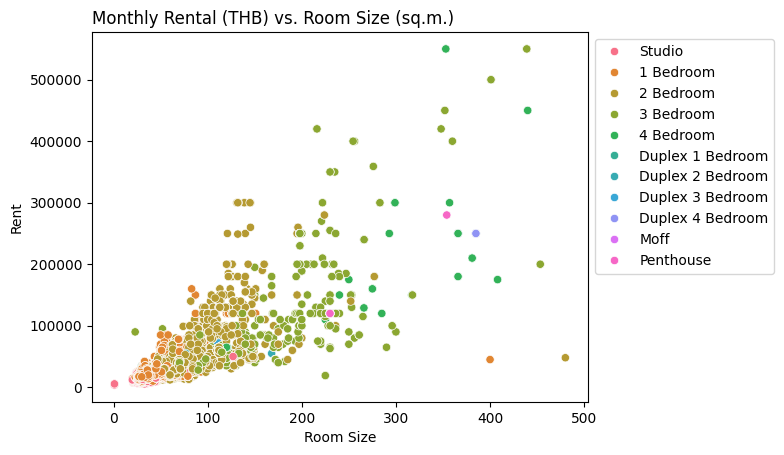

In [54]:
# Let's look at room prices vs room_size
hue_order = ['Studio','1 Bedroom','2 Bedroom','3 Bedroom','4 Bedroom','Duplex 1 Bedroom','Duplex 2 Bedroom','Duplex 3 Bedroom','Duplex 4 Bedroom','Moff','Penthouse']
line = sns.scatterplot(data=room, x="room_size", y="rental", hue='unit_type', hue_order=hue_order)
line.set(xlabel='Room Size', ylabel='Rent')
plt.title('Monthly Rental (THB) vs. Room Size (sq.m.)',loc='left')
plt.legend(bbox_to_anchor=(1,1));

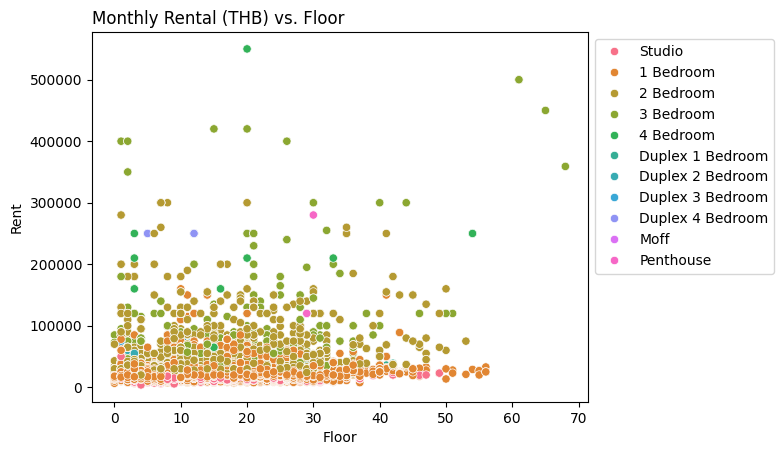

In [55]:
# Let's look at room prices vs floor
line = sns.scatterplot(data=room, x="floor", y="rental", hue='unit_type', hue_order=hue_order)
line.set(xlabel='Floor', ylabel='Rent')
plt.title('Monthly Rental (THB) vs. Floor',loc='left')
plt.legend(bbox_to_anchor=(1,1));

(0.0, 100000.0)

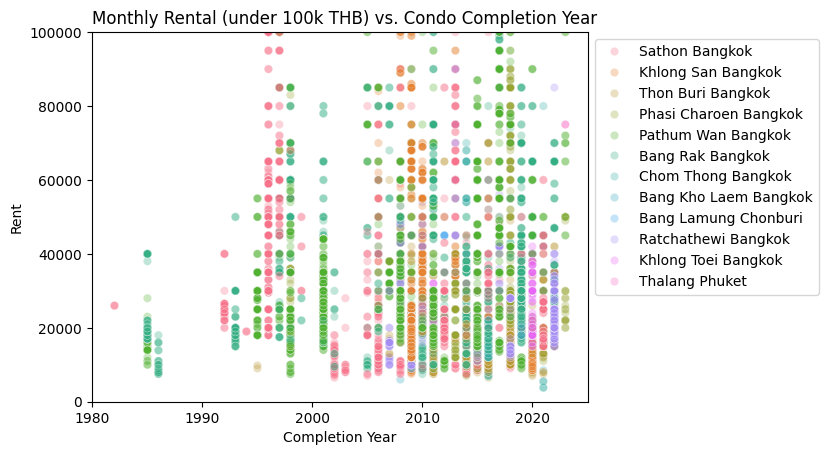

In [67]:
# Let's look at utility fee by area
graph = room.join(project, on='project_id', lsuffix='_room', rsuffix='_proj')
line = sns.scatterplot(data=graph, x="completed_on", y="rental", hue='address', alpha=0.3)
plt.title('Monthly Rental (under 100k THB) vs. Condo Completion Year',loc='left')
line.set(xlabel='Completion Year', ylabel='Rent')
plt.legend(bbox_to_anchor=(1,1));
plt.gca().set_ylim([0, 100000])
# plt.gca().set_xlim([0, 250]);

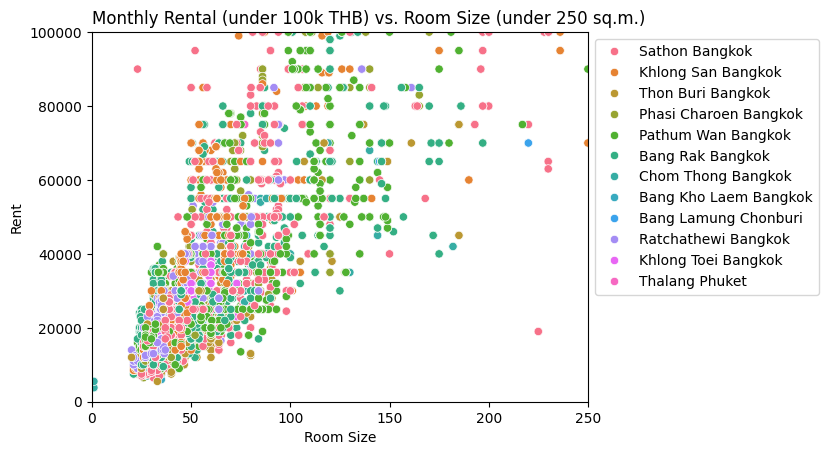

In [58]:
# Now let's join Room and Project tables using a foreign key
graph = room.join(project, on='project_id', lsuffix='_room', rsuffix='_proj')
line = sns.scatterplot(data=graph, x="room_size", y="rental", hue='address')
line.set(xlabel='Room Size', ylabel='Rent')
plt.title('Monthly Rental (under 100k THB) vs. Room Size (under 250 sq.m.)',loc='left')
plt.legend(bbox_to_anchor=(1,1))
plt.gca().set_ylim([0, 100000])
plt.gca().set_xlim([0, 250]);

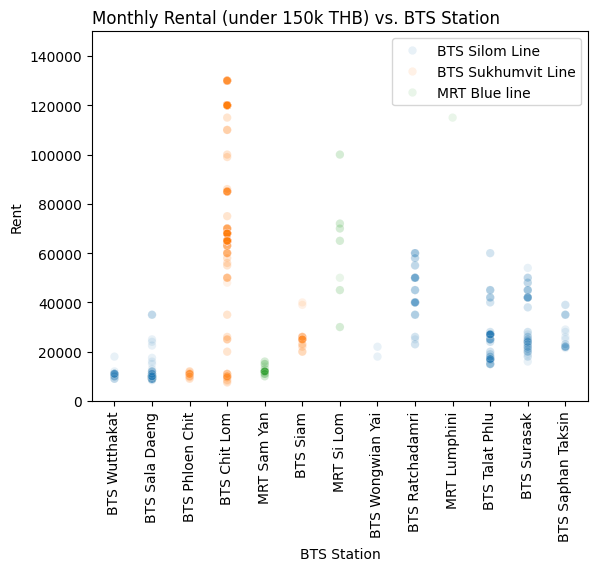

In [60]:
# Now let's join Room and Property Nearby tables using a foreign key
data = property_nearby[(property_nearby['property_type']=='BTS Silom Line') |
                       (property_nearby['property_type']=='BTS Sukhumvit Line') |
                       (property_nearby['property_type']=='MRT Blue line') |
                       (property_nearby['property_type']=='Gold Line')]

graph = room.join(data, on='project_id', lsuffix='_room', rsuffix='_pp')
line = sns.scatterplot(data=graph, x="property_name", y="rental", hue='property_type', alpha=0.1)
line.set(xlabel='BTS Station', ylabel='Rent')
plt.title('Monthly Rental (under 150k THB) vs. BTS Station',loc='left')
plt.legend(bbox_to_anchor=(1,1))
plt.gca().set_ylim([0, 150000])
plt.xticks(rotation=90);

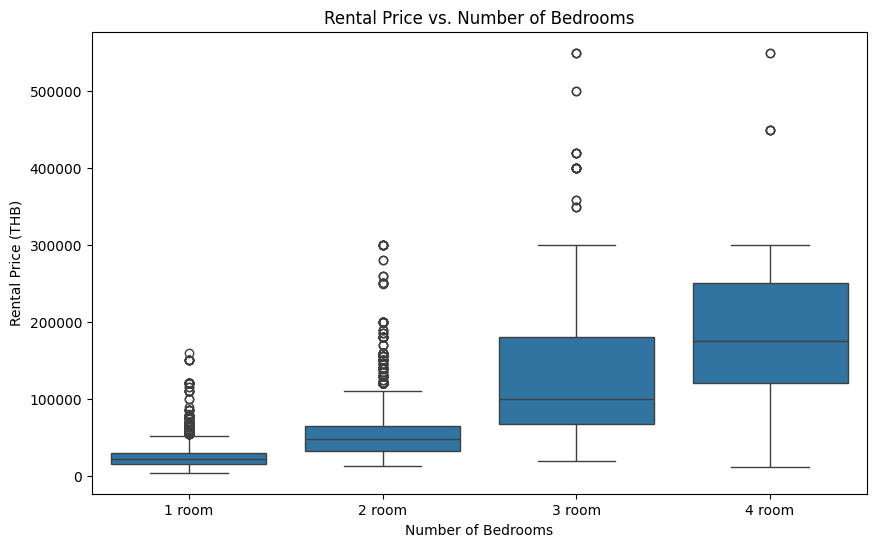

In [75]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='no_bedroom', y='rental')
plt.title('Rental Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

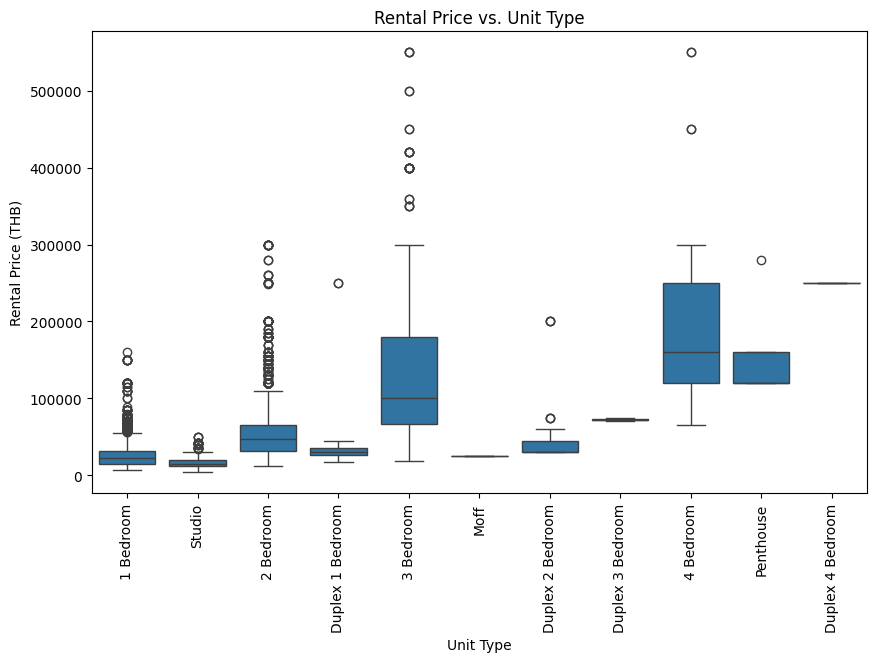

In [74]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='unit_type', y='rental')
plt.title('Rental Price vs. Unit Type')
plt.xlabel('Unit Type')
plt.ylabel('Rental Price (THB)')
plt.xticks(rotation=90);
plt.show()

In [78]:
room.groupby(["unit_type"])["room_id"].count()

unit_type
1 Bedroom           6118
2 Bedroom           3048
3 Bedroom            411
4 Bedroom             65
Duplex 1 Bedroom     129
Duplex 2 Bedroom      46
Duplex 3 Bedroom       2
Duplex 4 Bedroom       9
Moff                   6
Penthouse              4
Studio               474
Name: room_id, dtype: int64

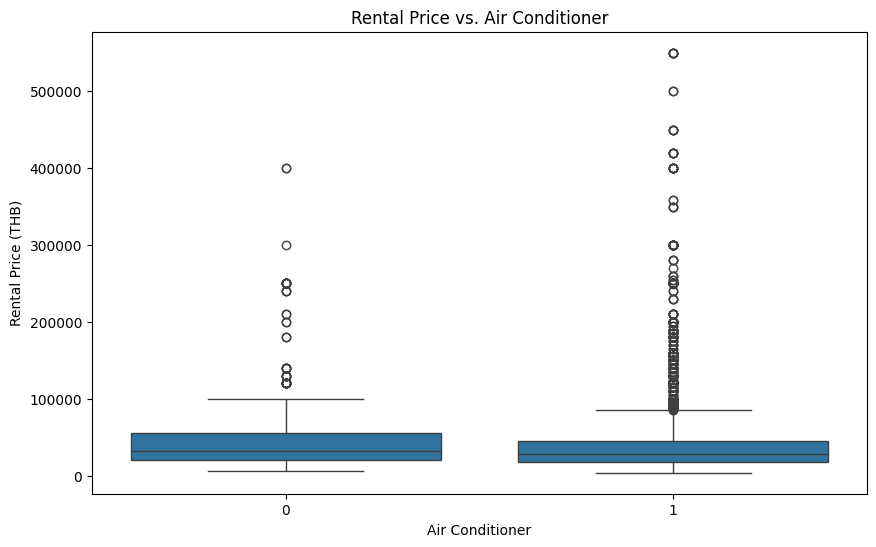

In [88]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='air_conditioner', y='rental')
plt.title('Rental Price vs. Air Conditioner')
plt.xlabel('Air Conditioner')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

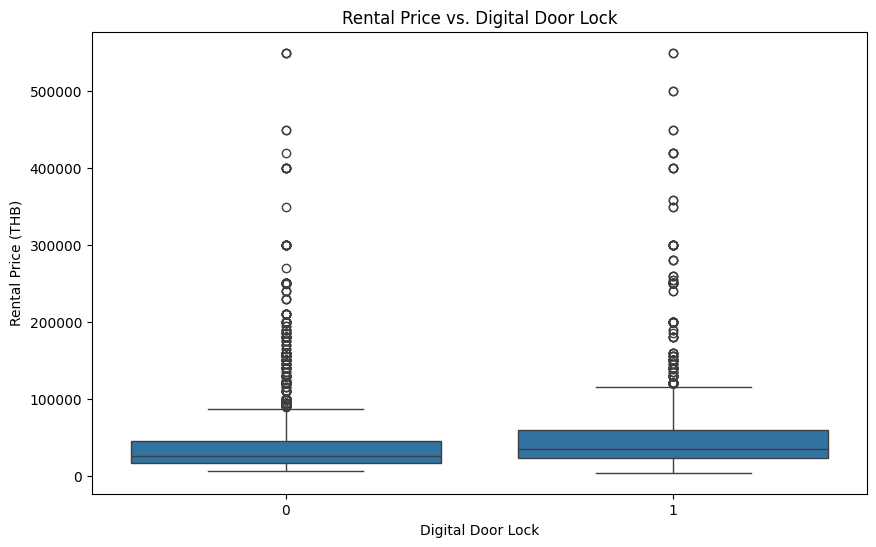

In [87]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='digital_door_lock', y='rental')
plt.title('Rental Price vs. Digital Door Lock')
plt.xlabel('Digital Door Lock')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

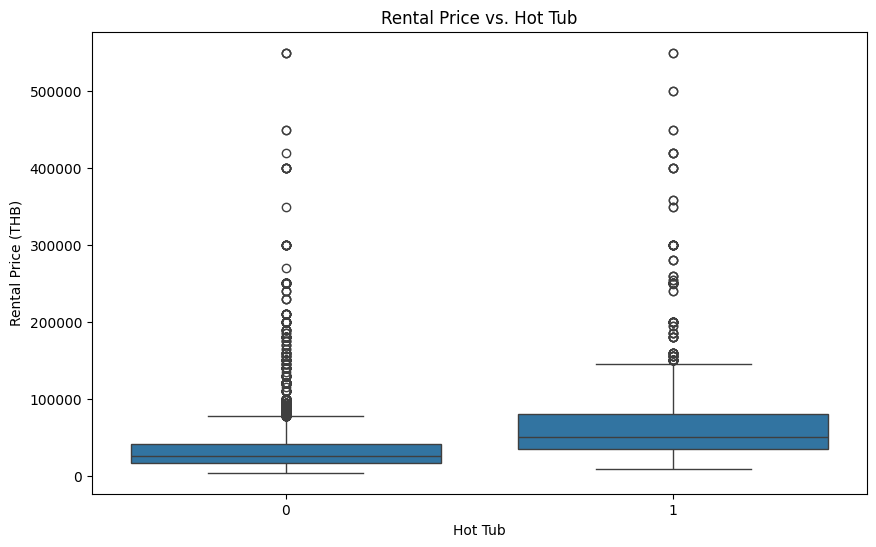

In [86]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='hot_tub', y='rental')
plt.title('Rental Price vs. Hot Tub')
plt.xlabel('Hot Tub')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

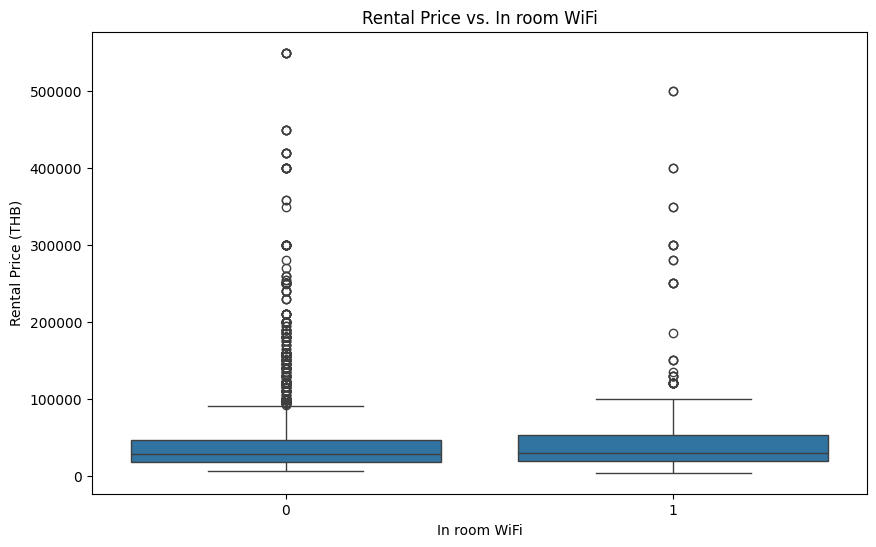

In [85]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='in_room_wifi', y='rental')
plt.title('Rental Price vs. In room WiFi')
plt.xlabel('In room WiFi')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

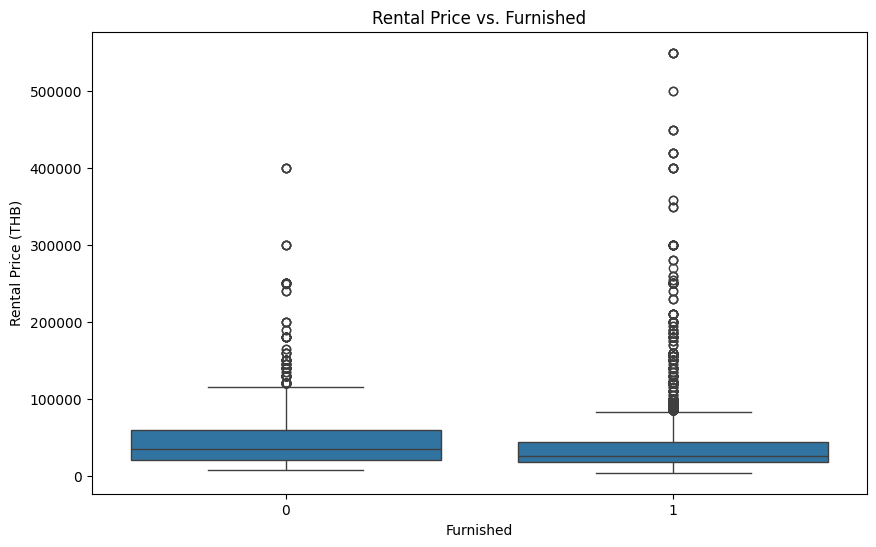

In [89]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='furnished', y='rental')
plt.title('Rental Price vs. Furnished')
plt.xlabel('Furnished')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

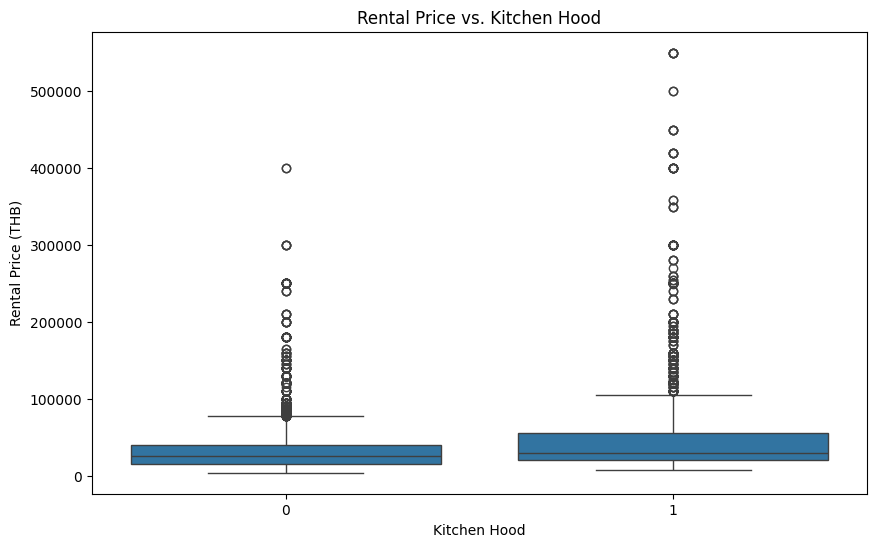

In [90]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='kitchen_hood', y='rental')
plt.title('Rental Price vs. Kitchen Hood')
plt.xlabel('Kitchen Hood')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

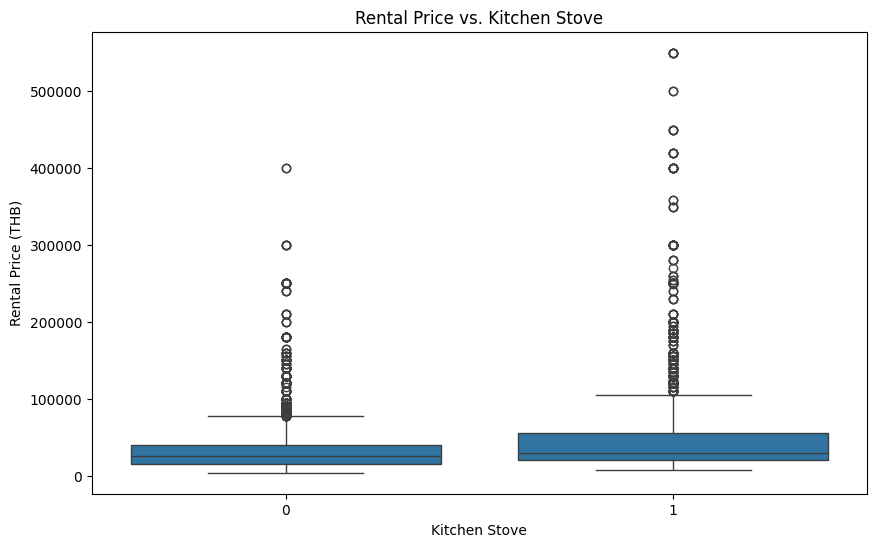

In [91]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='kitchen_stove', y='rental')
plt.title('Rental Price vs. Kitchen Stove')
plt.xlabel('Kitchen Stove')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

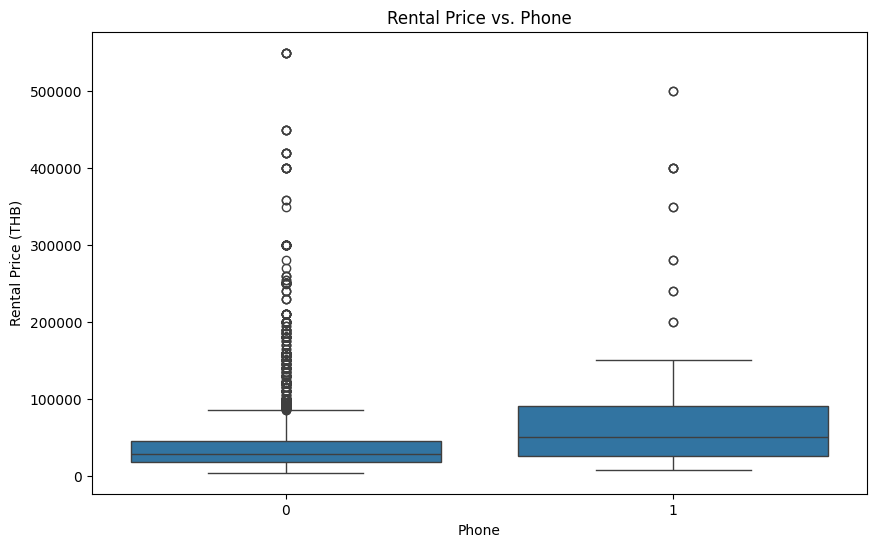

In [ ]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='phone', y='rental')
plt.title('Rental Price vs. Phone')
plt.xlabel('Phone')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

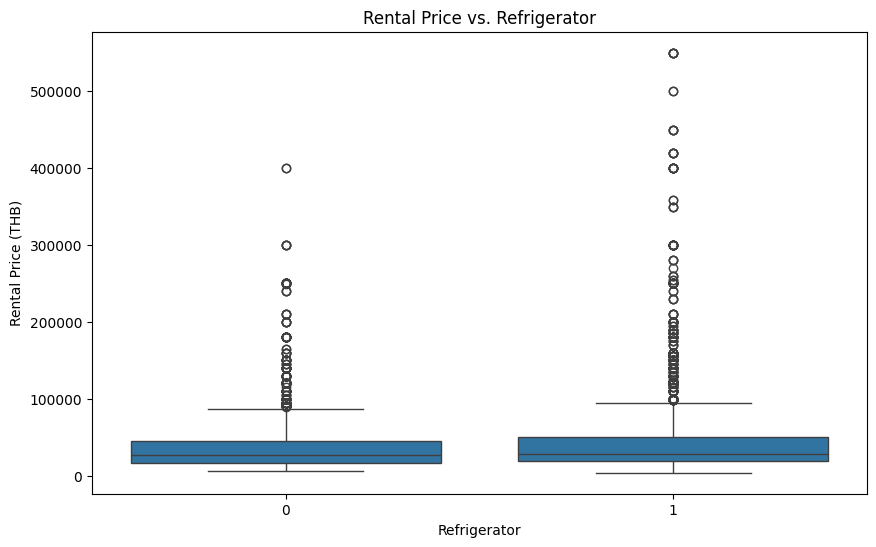

In [93]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='refrigerator', y='rental')
plt.title('Rental Price vs. Refrigerator')
plt.xlabel('Refrigerator')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

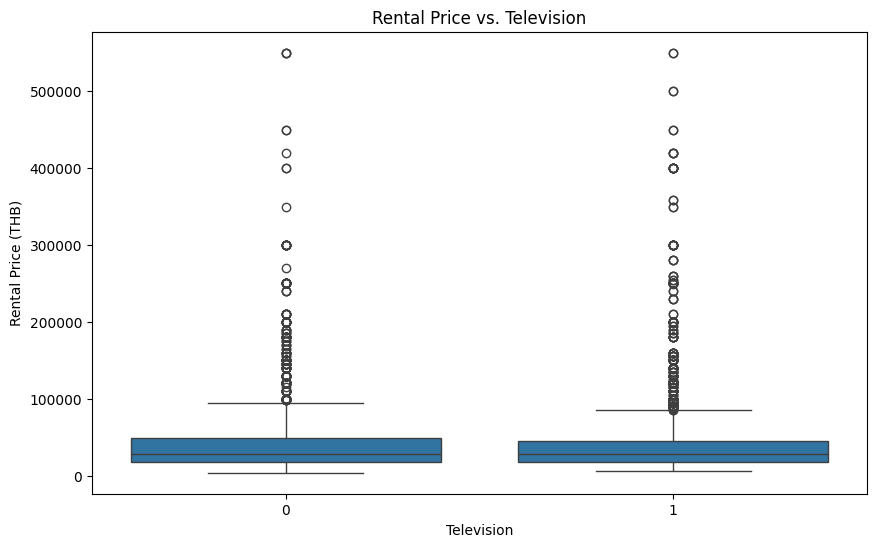

In [94]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='tv', y='rental')
plt.title('Rental Price vs. Television')
plt.xlabel('Television')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

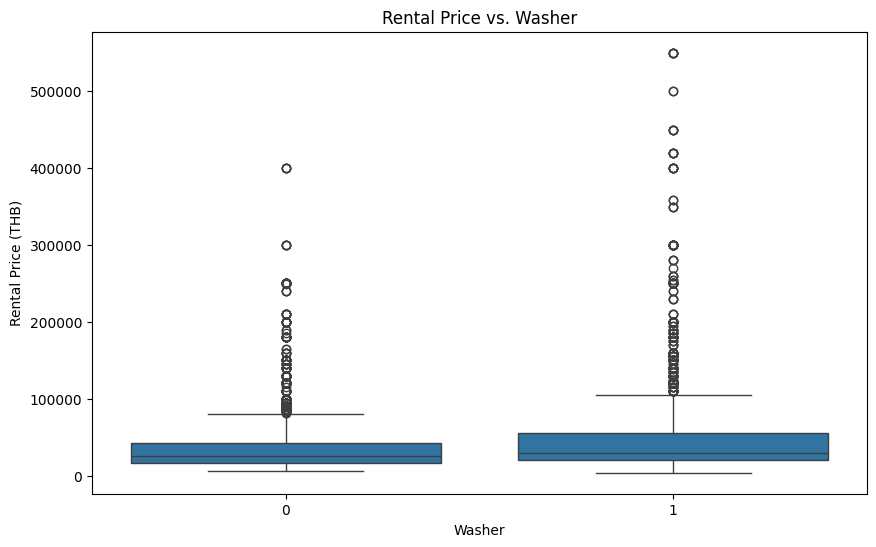

In [95]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='washer', y='rental')
plt.title('Rental Price vs. Washer')
plt.xlabel('Washer')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()

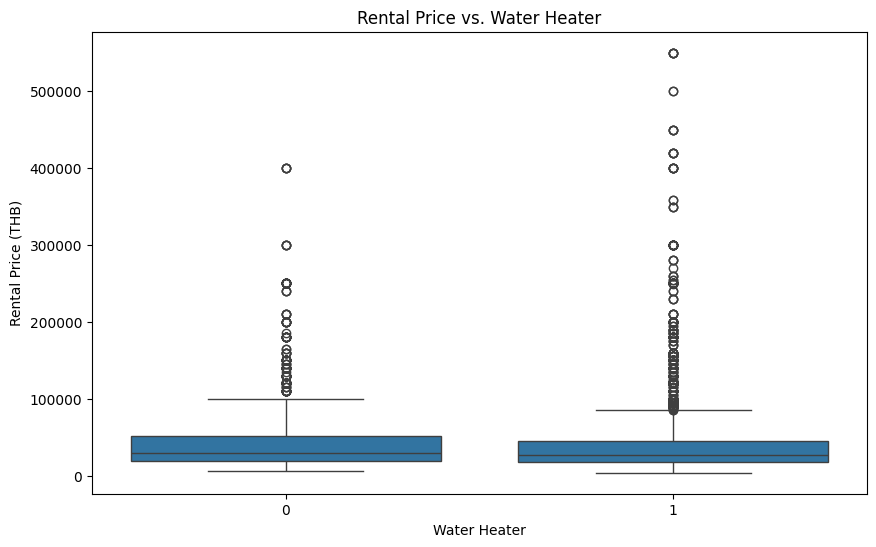

In [96]:
# Analyze the relationship between 'rental' and 'no_bedroom'
plt.figure(figsize=(10, 6))
sns.boxplot(data=room, x='water_heater', y='rental')
plt.title('Rental Price vs. Water Heater')
plt.xlabel('Water Heater')
plt.ylabel('Rental Price (THB)')
# plt.xticks(rotation=90);
plt.show()